In [4]:
import pandas as pd

In [5]:
names2010 = pd.read_csv('names/names/yob2010.txt', names=['name','sex','births'])
names2010

names2010.shape[0]
names2010.info()
names2010.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33838 entries, 0 to 33837
Data columns (total 3 columns):
name      33838 non-null object
sex       33838 non-null object
births    33838 non-null int64
dtypes: int64(1), object(2)
memory usage: 793.2+ KB


,name,sex,births
33833,Zymaire,M,5
33834,Zyonne,M,5
33835,Zyquarius,M,5
33836,Zyran,M,5
33837,Zzyzx,M,5


In [6]:
names2010.groupby('sex').births.sum()

sex
F    1759010
M    1898382
Name: births, dtype: int64

In [7]:
pieces=[]
for year in range(1880,2011):
    path = 'names/names/yob%d.txt' %year
    df = pd.read_csv(path, names=['name','sex','births'])
    df['year'] = year
    pieces.append(df)
    
names = pd.concat(pieces, ignore_index=True)

In [8]:
names.pivot_table(values='births', index='year', columns='sex', aggfunc=sum)
total_births = pd.pivot_table(data=names, values='births', index='year', columns='sex', aggfunc=sum )
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


In [9]:
def add_prop(group):
    births = group.births.sum()
    group['prop'] = group.births/births
    return group
    

names = names.groupby(['year','sex']).apply(add_prop)
print(names)

              name sex  births  year      prop
0             Mary   F    7065  1880  0.077643
1             Anna   F    2604  1880  0.028618
2             Emma   F    2003  1880  0.022013
3        Elizabeth   F    1939  1880  0.021309
4           Minnie   F    1746  1880  0.019188
...            ...  ..     ...   ...       ...
1690779    Zymaire   M       5  2010  0.000003
1690780     Zyonne   M       5  2010  0.000003
1690781  Zyquarius   M       5  2010  0.000003
1690782      Zyran   M       5  2010  0.000003
1690783      Zzyzx   M       5  2010  0.000003

[1690784 rows x 5 columns]


In [10]:
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]
    
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)
#그룹 인덱스 제거
top1000.reset_index(inplace=True, drop=True)

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


In [11]:
total_births = top1000.pivot_table('births',index='year', columns='name', aggfunc=sum)

In [12]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [13]:
%matplotlib inline

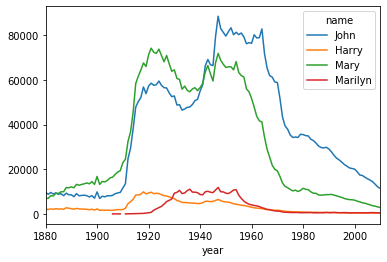

In [14]:
subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C07F04E48>,
      dtype=object)

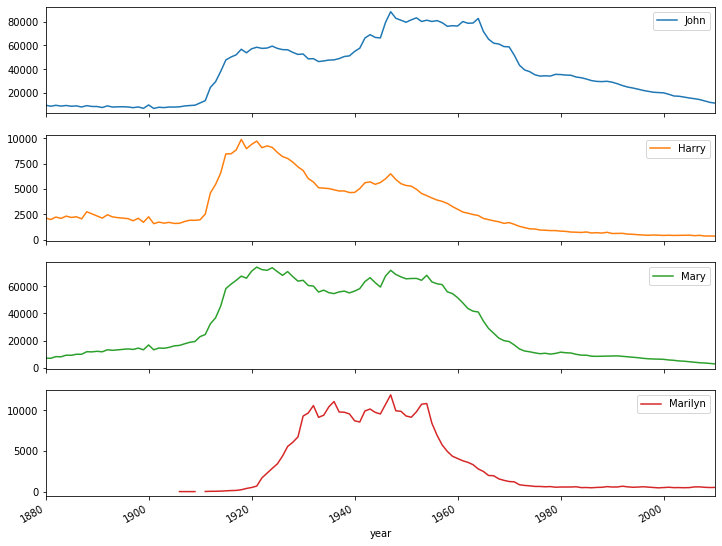

In [15]:
subset.plot(subplots=True, figsize=(12,10))

In [16]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

In [17]:
import numpy as np

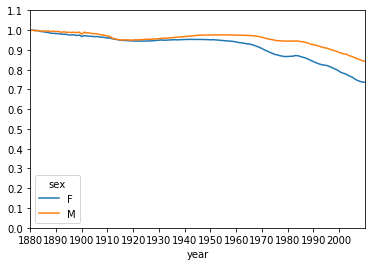

In [18]:
table.plot(yticks=np.linspace(0,1.1,12), xticks=range(1880,2010,10))

In [19]:
girls = top1000[top1000.sex=='F']
boys = top1000[top1000.sex=='M']

In [20]:
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [21]:
df = boys[boys.year==2010]

In [22]:
df.sort_values(by='prop', ascending=False) #prop을 기준으로 내림차순 정렬

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [23]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]
prop_cumsum.values.searchsorted(0.5) #누적합이 0.5가 되는 지점의 위치 출력
#117번째 아이의 이름에서 0.5(50%)가 됨

116

In [24]:
df = boys[boys.year==1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900
in1900.values.searchsorted(0.5)+1

25

In [25]:
top1000

def get_qc(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q)+1

diversity = top1000.groupby(['year','sex']).apply(get_qc)
print(diversity)


year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2008  M      109
2009  F      241
      M      114
2010  F      246
      M      117
Length: 262, dtype: int64


C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  after removing the cwd from sys.path.


In [26]:
diversity = diversity.unstack('sex')
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


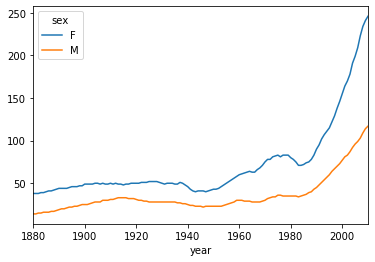

In [27]:
diversity.plot()

In [28]:
#이름에 사용된 철자의 변화패턴?
#상위 50% 이름들에 사용된 철자들의 비율
#1880 - a:3%......z:0.1%
#1881 - a........z
#...
#2010 - a....

In [38]:
#이름의 마지막 글자에 대한 변화
#names 열에서 마지막 글자를 추출
last_letters = names.name.map(lambda x:x[-1])
# names.name.map(get_in)
last_letters.name = 'last_letter'
last_letters
table = names.pivot_table('births', index=last_letters, columns=['sex','year'], aggfunc=sum)

In [42]:
table #1900,1950,2010년 
subtable = table.reindex(columns=[1900,1950,2010], level='year')
subtable

sex                 F                            M                    
year             1900      1950      2010     1900      1950      2010
last_letter                                                           
a             89934.0  576481.0  670605.0    870.0    4037.0   28438.0
b                 NaN      17.0     450.0    372.0    1632.0   38859.0
c                 NaN      16.0     946.0    299.0    6500.0   23125.0
d              3670.0    4413.0    2607.0  15499.0  263643.0   44398.0
e            107080.0  376863.0  313833.0  22731.0  168659.0  129012.0
f                 NaN       NaN      97.0    116.0     851.0    2255.0
g                33.0     109.0     657.0    253.0    7437.0    2666.0
h             15303.0   77899.0  133424.0   6234.0   67926.0   98090.0
i               360.0   18111.0   55820.0    155.0     622.0   42956.0
j                 NaN       NaN     159.0      NaN       5.0    1459.0
k                30.0     202.0     626.0   6074.0   55780.0   35198.0
l             14654.0   65088.0   46360.0   9317.0  172053.0  133583.0
m               307.0    1608.0    4552.0  10805.0   68846.0   46808.0
n             18269.0  251970.0  246631.0  20723.0  251831.0  688677.0
o               348.0    7248.0    2187.0   1770.0   19269.0   81025.0
p                 NaN      36.0      35.0    432.0   11391.0    2409.0
q                 NaN       NaN      53.0      NaN       NaN     342.0
r              3625.0    8398.0   31707.0  10288.0   61049.0  166064.0
s              9453.0   39035.0   23451.0  20059.0  241618.0  123670.0
t              6965.0   38183.0   13773.0  10265.0  122970.0   43398.0
u               350.0     918.0     734.0     27.0      77.0    2318.0
v                 NaN       NaN     205.0     19.0      29.0    2723.0
w                 6.0      42.0    2080.0    949.0    7028.0   30656.0
x                 NaN      54.0    1279.0    528.0    3192.0   16352.0
y             28876.0  245709.0  205501.0  12746.0  253223.0  110425.0
z               610.0     601.0    1238.0     23.0     268.0    3476.0

In [48]:
subtable.sum(axis=0)

letter_prop = subtable/subtable.sum(axis=0) #사용된 마지막 글자의 비율

#연습문제 1
#1900년 남자아이, 여자아이의 전체 수 출력

In [47]:
import matplotlib.pyplot as plt

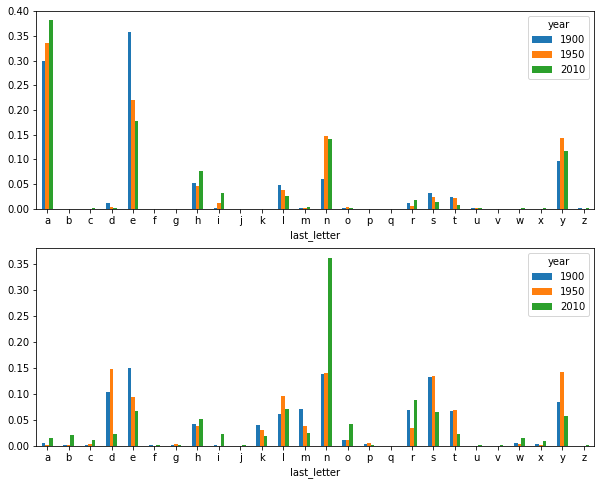

In [57]:
fig,axes = plt.subplots(2,1, figsize=(10,8))
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[0]) #barplot은 bar그래프를 디테일하게 설정할 수 있음
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[1])

In [62]:
#d,n,y의 변화를 꺾은선 그래프로 출력
letter_prop

sex                 F                             M                    
year             1900      1950      2010      1900      1950      2010
last_letter                                                            
a            0.299907  0.336533  0.381240  0.005779  0.002255  0.014980
b                 NaN  0.000010  0.000256  0.002471  0.000912  0.020470
c                 NaN  0.000009  0.000538  0.001986  0.003631  0.012181
d            0.012239  0.002576  0.001482  0.102946  0.147292  0.023387
e            0.357084  0.220002  0.178415  0.150982  0.094226  0.067959
f                 NaN       NaN  0.000055  0.000770  0.000475  0.001188
g            0.000110  0.000064  0.000374  0.001680  0.004155  0.001404
h            0.051032  0.045475  0.075852  0.041407  0.037949  0.051670
i            0.001201  0.010573  0.031734  0.001030  0.000347  0.022628
j                 NaN       NaN  0.000090       NaN  0.000003  0.000769
k            0.000100  0.000118  0.000356  0.040344  0.031163  0.018541
l            0.048867  0.037996  0.026356  0.061885  0.096122  0.070367
m            0.001024  0.000939  0.002588  0.071768  0.038463  0.024657
n            0.060922  0.147093  0.140210  0.137645  0.140693  0.362771
o            0.001160  0.004231  0.001243  0.011757  0.010765  0.042681
p                 NaN  0.000021  0.000020  0.002869  0.006364  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.012088  0.004903  0.018025  0.068334  0.034107  0.087477
s            0.031523  0.022787  0.013332  0.133235  0.134987  0.065145
t            0.023226  0.022290  0.007830  0.068182  0.068701  0.022861
u            0.001167  0.000536  0.000417  0.000179  0.000043  0.001221
v                 NaN       NaN  0.000117  0.000126  0.000016  0.001434
w            0.000020  0.000025  0.001182  0.006303  0.003926  0.016148
x                 NaN  0.000032  0.000727  0.003507  0.001783  0.008614
y            0.096294  0.143438  0.116828  0.084661  0.141470  0.058168
z            0.002034  0.000351  0.000704  0.000153  0.000150  0.001831

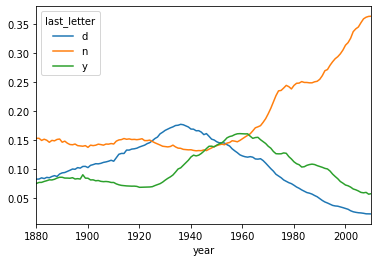

In [70]:
letter_prop = table/table.sum()

letter_prop.loc[['d','n','y']]
dny_ts = letter_prop.loc[['d','n','y'],'M']
dny_ts = dny_ts.T
dny_ts.plot()

## 영화 평점 데이터

In [80]:
unames = ['user_id','gender','age','occupation','zip']
rnames = ['user_id','movie_id','ratings','timestamp']
mnames = ['movie_id','title','genres']


upath = 'dataset/movielens/users.dat'
rpath = 'dataset/movielens/ratings.dat'
mpath = 'dataset/movielens/movies.dat'

users = pd.read_csv(upath, sep='::', header=None, names=unames)
ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames)
movies = pd.read_csv(mpath, sep='::', header=None, names=mnames)

users
ratings
movies

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid th

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [85]:
data = pd.merge(pd.merge(ratings,users), movies)
data
data.iloc[0]

user_id                                            1
movie_id                                        1193
ratings                                            5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [111]:
#성별에 따른 각 영화의 평균 평점
mean_ratings = data.pivot_table('ratings', index='title', columns='gender', aggfunc='mean')
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


In [120]:
ratings_by_title = data.groupby('title').size()
# ratings_by_title.index
active_titles = ratings_by_title[ratings_by_title>=250].index
# ratings_by_title[ratings_by_title>=250].values
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [128]:
"""
mean_ratings에서 active_titles에 저장된 
영화제목에 대한 데이터만 추출
"""
mean_ratings.iloc[0]  #$1,000,000 Duck (1971)
mean_ratings.loc['$1,000,000 Duck (1971)']

mean_ratings = mean_ratings.loc[active_titles]

In [129]:
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [133]:
#'F'를 기준으로 내림차순 정렬
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
# mean_ratings.sort_index(by='F', ascending=False)

In [134]:
top_female_ratings

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
...,...,...
"Avengers, The (1998)",1.915254,2.017467
Speed 2: Cruise Control (1997),1.906667,1.863014
Rocky V (1990),1.878788,2.132780


In [145]:
#남녀간 평점차를 구햇을 때, 가장 평점차가 큰 영화제목이 무엇인지 확인
mean_ratings['difference'] = mean_ratings['F']-mean_ratings['M']
#difference를 기준으로 오름차순 정렬
sorted_by_diff = mean_ratings.sort_values(by='difference')
sorted_by_diff[:20]

gender,F,M,difference
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,-0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,-0.676359
Dumb & Dumber (1994),2.697987,3.336595,-0.638608
"Longest Day, The (1962)",3.411765,4.031447,-0.619682
"Cable Guy, The (1996)",2.250000,2.863787,-0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,-0.611985
"Hidden, The (1987)",3.137931,3.745098,-0.607167
Rocky III (1982),2.361702,2.943503,-0.581801
Caddyshack (1980),3.396135,3.969737,-0.573602


In [146]:
#역순으로 출력
sorted_by_diff[::-1]

gender,F,M,difference
title,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
Grease (1978),3.975265,3.367041,0.608224
Little Women (1994),3.870588,3.321739,0.548849
Steel Magnolias (1989),3.901734,3.365957,0.535777
...,...,...,...
"Cable Guy, The (1996)",2.250000,2.863787,-0.613787
"Longest Day, The (1962)",3.411765,4.031447,-0.619682
Dumb & Dumber (1994),2.697987,3.336595,-0.638608


In [159]:
#평점의 표준편차
rs_by_title = data.groupby('title')['ratings'].std()
rs_by_title = rs_by_title.loc[active_titles]
rs_by_title
#표준편차를 내림차순으로 정렬
rs_by_title.sort_values(ascending=False)

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
                                           ...   
Wrong Trousers, The (1993)               0.708666
Shawshank Redemption, The (1994)         0.700443
Great Escape, The (1963)                 0.692585
Rear Window (1954)                       0.688946
Close Shave, A (1995)                    0.667143
Name: ratings, Length: 1216, dtype: float64

In [162]:
#1

pieces=[]
for year in range(1880,2011):
    path = 'names/names/yob%d.txt' %year
    df = pd.read_csv(path, header=None, names=['name','sex','births'])
    df['year'] = year
    pieces.append(df)

names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [169]:
girls = names[names['sex']=='F']
girls1900 = girls[girls['year']==1900]
girls1900.births.sum()

#1900년 여자아이 수: 299873

299873

In [175]:
boys = names[names['sex']=='M']
boys1900 = boys[boys['year']==1900]
boys1900.births.sum()
#1900년 남자아이 수: 150554

150554

In [197]:
#2
import matplotlib.pyplot as plt

In [188]:
#Leslie

name_Leslie = names[names['name']=='Leslie']
Leslie_f = name_Leslie[name_Leslie['sex']=='F'][['births','year']]
Leslie_m = name_Leslie[name_Leslie['sex']=='M'][['births','year']]
Leslie_f

,births,year
654,8,1880
2523,11,1881
4593,9,1882
6850,7,1883
8697,15,1884
...,...,...
1518523,3035,2006
1552581,2689,2007
1587484,2323,2008
1622503,1975,2009


In [203]:
name_Leslie = names[names['name']=='Leslie']
name_Leslie

,name,sex,births,year
654,Leslie,F,8,1880
1108,Leslie,M,79,1880
2523,Leslie,F,11,1881
3072,Leslie,M,92,1881
4593,Leslie,F,9,1882
...,...,...,...,...
1609661,Leslie,M,76,2008
1622503,Leslie,F,1975,2009
1644362,Leslie,M,76,2009
1657142,Leslie,F,1558,2010


In [205]:
name_Leslie = name_Leslie.pivot_table('births', index='year', columns='sex')
name_Leslie

sex,F,M
year,,
1880,8,79
1881,11,92
1882,9,122
1883,7,120
1884,15,125
...,...,...
2006,3035,82
2007,2689,82
2008,2323,76


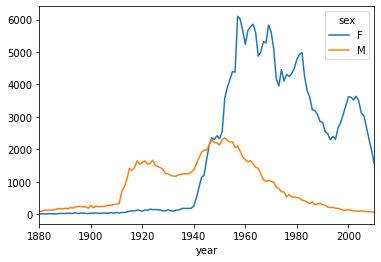

In [206]:
name_Leslie.plot()

In [212]:
# Lesley
name_Lesley = names[names['name']=='Lesley']
name_Lesley = name_Lesley.pivot_table('births', index='year', columns='sex')
name_Lesley

sex,F,M
year,,
1882,NaN,6.0
1883,NaN,5.0
1893,5.0,NaN
1896,NaN,5.0
1897,NaN,5.0
...,...,...
2006,370.0,12.0
2007,351.0,7.0
2008,253.0,5.0


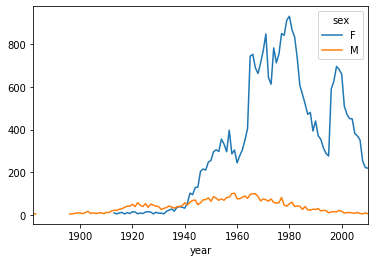

In [211]:
name_Lesley.plot()

In [217]:
# Leslee

name_Leslee = names[names['name']=='Leslee']
name_Leslee = name_Leslee.pivot_table('births', index='year', columns='sex')
name_Leslee

sex,F,M
year,,
1922,8.0,NaN
1935,9.0,NaN
1937,6.0,NaN
1939,8.0,NaN
1940,6.0,NaN
...,...,...
2006,21.0,NaN
2007,30.0,NaN
2008,25.0,NaN


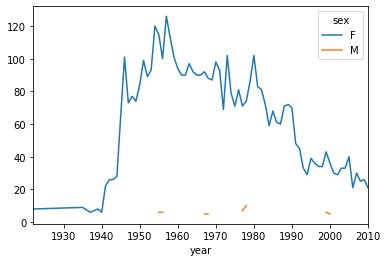

In [218]:
name_Leslee.plot()

In [222]:
# Lesli

name_Lesli = names[names['name']=='Lesli']
name_Lesli = name_Lesli.pivot_table('births', index='year', columns='sex')
name_Lesli

sex,F
year,
1946,13
1947,12
1948,8
1949,17
1950,20
...,...
2006,162
2007,135
2008,137


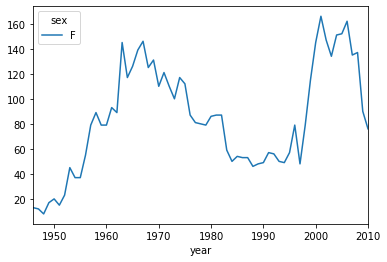

In [223]:
name_Lesli.plot()

In [226]:
# Lesly

name_Lesly = names[names['name']=='Lesly']
name_Lesly = name_Lesly.pivot_table('births', index='year', columns='sex')
name_Lesly

sex,F,M
year,,
1919,NaN,5.0
1920,NaN,6.0
1921,NaN,5.0
1922,NaN,5.0
1923,NaN,7.0
...,...,...
2006,761.0,NaN
2007,765.0,NaN
2008,699.0,NaN


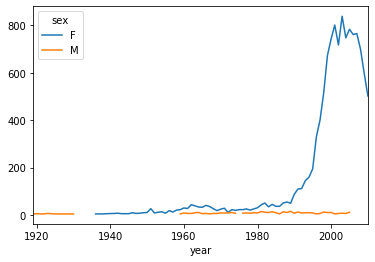

In [227]:
name_Lesly.plot()

In [238]:
#3

animals = pd.read_csv('animal names.csv', encoding='cp949')
animals

,등록이름,등록건수,데이터기준일자
0,코코,238,2019-12-03
1,보리,190,2019-12-03
2,초코,175,2019-12-03
3,콩이,158,2019-12-03
4,해피,139,2019-12-03
...,...,...,...
4166,흰털,1,2019-12-03
4167,히마,1,2019-12-03
4168,힌둥,1,2019-12-03
4169,힐링,1,2019-12-03


In [244]:
animal_names = animals['등록이름'].values
len(animal_names)

4171